<a href="https://colab.research.google.com/github/wmchen312/TibameDL/blob/main/DL1018Cifar10_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train,y_train),(x_test,y_test)=load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)


In [ ]:
#mnist(60000,):[3,1,4,5]
#cifar10(50000,1): [[3],[1],[4],[5]] 
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
trans=[
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",									
    "frog",										
    "horse",									
    "ship",										
    "truck",						
]

horse


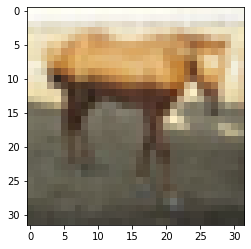

In [ ]:
import matplotlib.pyplot as plt
idx=2000
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
    # 一個filter: 3(kh) * 3(kw) * 3(last channel) + 1(bias) = 28. 
    # 28 * 64 = 1792 
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    # 一個filter: 3 * 3 * 64 + 1(bias) = 577
    # 128 * 577 = 73856
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 512)        

In [ ]:
# y: 做one-hot encoding很耗費ram, 直接使用Sparse省RAM又方便
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
x_train_norm= x_train / 255.0
x_test_norm= x_test / 255.0

In [ ]:
# batch_size: 看多少筆資料調整一次梯度(10-200)
# = 200: 54000(訓練資料) / 200 -> 270(次)梯度調整
# epochs: 54000筆看幾次
# = 10: 270 * 10 (次) 梯度調整
# validation_split: 0.1
# verbose: 1(進度條) 0(啥都沒) 2(不會有進度條)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cifar10.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 10s - loss: 1.7347 - accuracy: 0.3539 - val_loss: 1.4799 - val_accuracy: 0.4582
Epoch 2/100
225/225 - 9s - loss: 1.3406 - accuracy: 0.5118 - val_loss: 1.2307 - val_accuracy: 0.5522
Epoch 3/100
225/225 - 9s - loss: 1.1550 - accuracy: 0.5831 - val_loss: 1.0829 - val_accuracy: 0.6064
Epoch 4/100
225/225 - 9s - loss: 1.0271 - accuracy: 0.6338 - val_loss: 0.9878 - val_accuracy: 0.6488
Epoch 5/100
225/225 - 9s - loss: 0.9139 - accuracy: 0.6753 - val_loss: 0.9193 - val_accuracy: 0.6776
Epoch 6/100
225/225 - 9s - loss: 0.8504 - accuracy: 0.7014 - val_loss: 0.8690 - val_accuracy: 0.6954
Epoch 7/100
225/225 - 9s - loss: 0.7733 - accuracy: 0.7261 - val_loss: 0.8254 - val_accuracy: 0.7154
Epoch 8/100
225/225 - 9s - loss: 0.7224 - accuracy: 0.7461 - val_loss: 0.7425 - val_accuracy: 0.7376
Epoch 9/100
225/225 - 9s - loss: 0.6684 - accuracy: 0.7656 - val_loss: 0.6977 - val_accuracy: 0.7626
Epoch 10/100
225/225 - 9s - loss: 0.6203 - accuracy: 0.7833 - val_loss: 0.6854 - val_accur

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.6763 - accuracy: 0.7755


[0.6762544512748718, 0.7754999995231628]

In [ ]:
proba = model.predict(x_test_norm)
pre = proba.argmax(axis=1)
print(pre.shape)
print(y_test.shape)
y_test_1d = y_test.reshape(10000)
print(y_test_1d.shape)

(10000,)
(10000, 1)
(10000,)


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# tf: predict -> sklearn: predict_proba
# axis: 0(縱) 1(橫)
mat = confusion_matrix(y_test_1d, pre)
pd.DataFrame(mat,
             index=["{}(正確)".format(trans[i]) for i in range(10)],
             columns=["{}(預測)".format(trans[i]) for i in range(10)])

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),857,7,32,5,11,4,5,11,53,15
automobile(正確),38,807,7,4,0,3,5,1,43,92
bird(正確),63,2,779,29,37,40,28,11,5,6
cat(正確),31,3,91,577,41,159,35,31,19,13
deer(正確),23,2,108,38,696,36,37,51,7,2
dog(正確),22,3,57,120,34,701,16,31,7,9
frog(正確),7,2,81,52,18,16,802,4,11,7
horse(正確),27,0,55,15,37,53,5,792,6,10
ship(正確),58,10,12,5,3,0,1,2,893,16
truck(正確),56,36,10,7,2,2,4,7,25,851


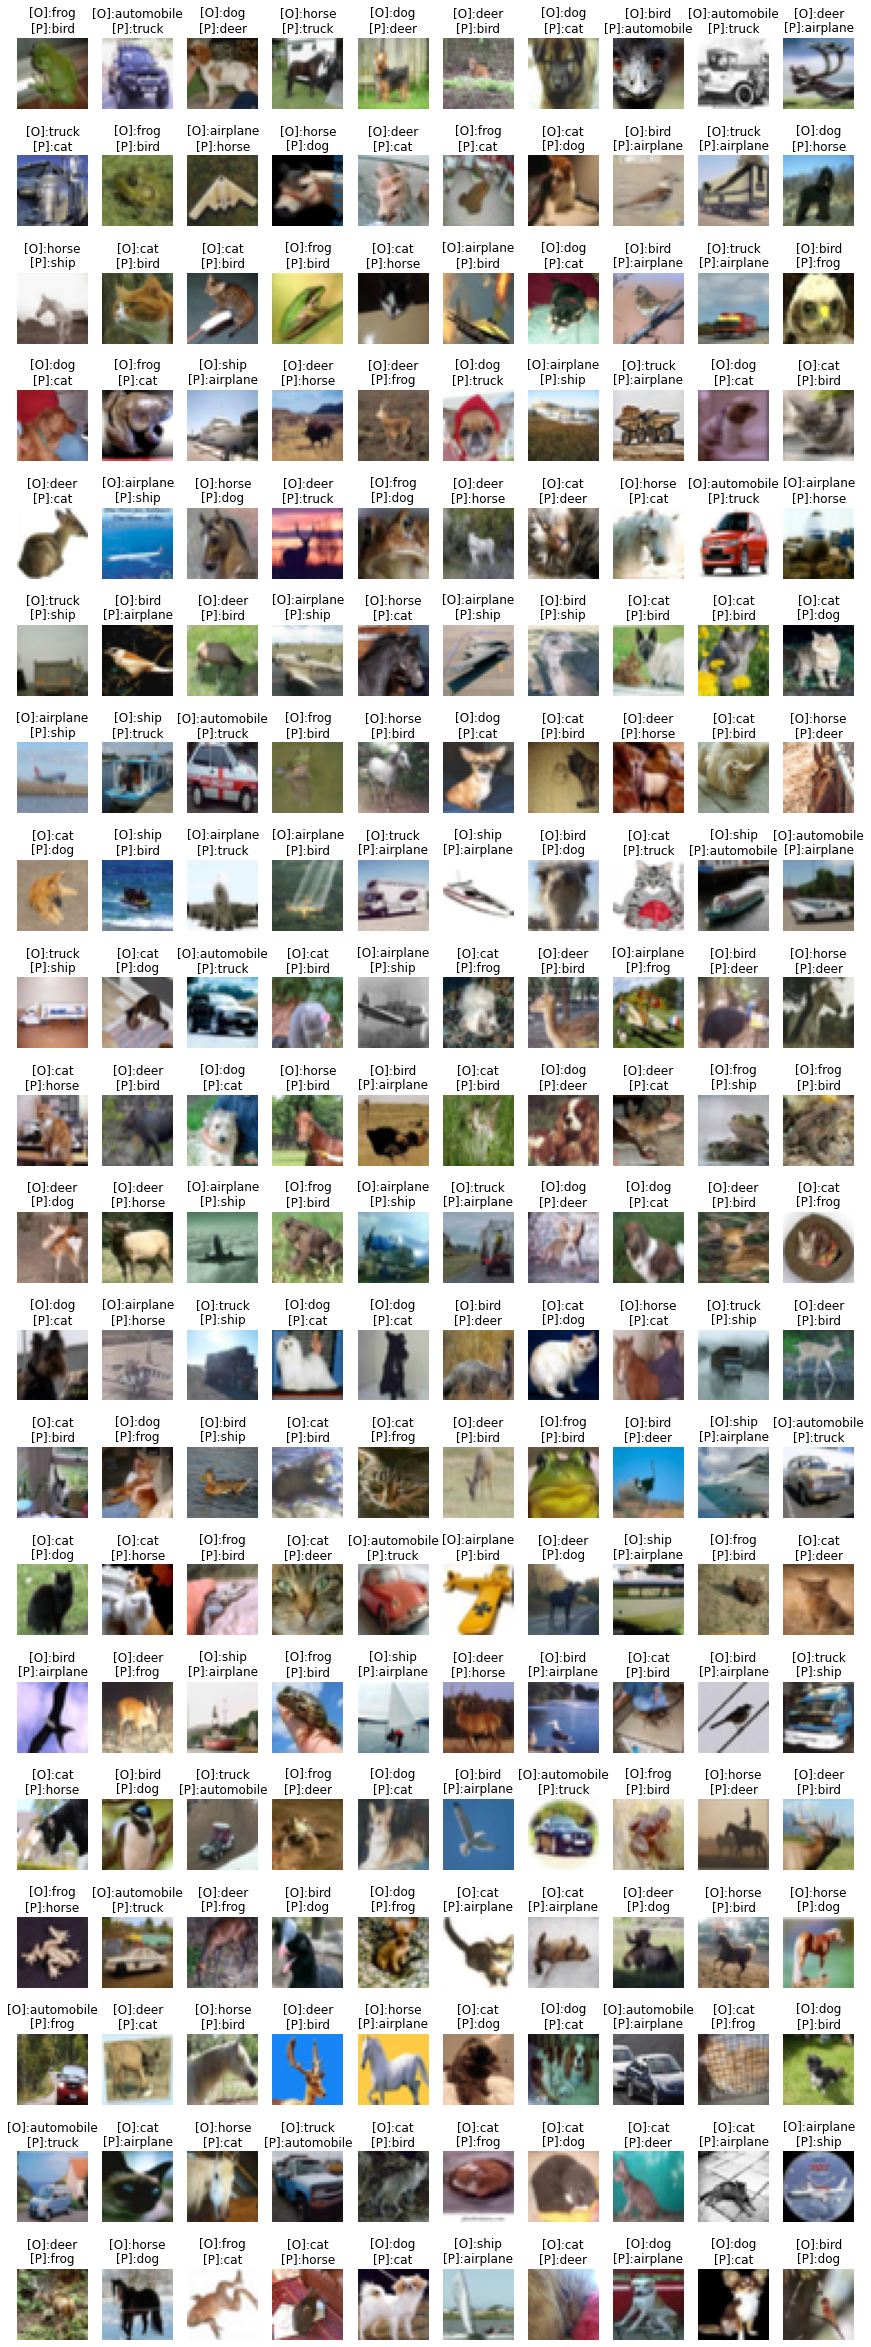

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test_1d)[0]
idx = idx[:200]
pre_false_img = x_test[idx]
pre_false_val = pre[idx]
pre_false_ori = y_test_1d[idx]

plt.figure(figsize=(15, 45))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_ori[i]],
                                trans[pre_false_val[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])